In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#function to calculate the loss of a model
def get_loss(x, y, theta):
    """x is input data (m x n)
       y is ground truths (m x 1)
       theta is model params (n x 1)"""
    h = x.dot(theta)
    error = np.subtract(h, y)
    sqError = np.square(error)
    sumSqError = np.sum(sqError)
    avgSqError = sumSqError /(2 * len(y)) 
    return avgSqError

In [3]:
#Function to run the gradient descent algorithm
def gradient_descent(x, y, theta, a, iterations):
    """x is input data (m x n)
       y is ground truths (m x 1)
       theta is model params (n x 1)
       a is learn rate (scalar)
       iterations. duh. (scalar)"""
    losses = np.zeros(iterations)
    for i in range(iterations):
        h = x.dot(theta)
        error = np.subtract(h, y)
        delta = x.transpose().dot(error)
        grad = delta / len(y) 
        theta = theta - (a * grad)
        losses[i] = get_loss(x, y, theta)
    return theta, losses

In [4]:
#Read in the CSV into a dataframe
csvData = pd.read_csv("./D3.csv")

print("CSV Data")
print(csvData.head(2))

CSV Data
         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650


In [5]:
#convert the dataframe into formatted np arrays

#initialize some variables
csvCols = len(csvData.columns)
csvRows = len(csvData)

x = np.ones((csvRows, 1))
y = csvData.values[:,csvCols-1].reshape(csvRows, 1)
for i in range(csvCols-1): #populate x
    col = csvData.values[:,i].reshape(csvRows, 1)
    x = np.hstack((x, col))

print("first two X")
print(x[0:2,:])
print("first two Y")
print(y[0:2,:])

first two X
[[1.         0.         3.44       0.44      ]
 [1.         0.04040404 0.1349495  0.88848485]]
first two Y
[[4.38754501]
 [2.6796499 ]]


In [6]:
#Populate the initial algorithm values

#SETTINGS
# Initial Theta Values (constant across array)
THETA_INIT = 0
# Learn rate
LEARN_RATE = 0.025
# Gradient descent iterations
ITERATIONS = 750

initialTheta = THETA_INIT * np.ones((csvCols,1))

print("Initial Thetas")
print(initialTheta)

Initial Thetas
[[0.]
 [0.]
 [0.]
 [0.]]


In [7]:
#Run the gradient descent

finalTheta, lossHistory = gradient_descent(x,y,initialTheta,LEARN_RATE,ITERATIONS)
print("Final Thetas")
print(finalTheta)

Final Thetas
[[ 4.51518222]
 [-1.89084942]
 [ 0.66459065]
 [-0.14848691]]


Text(0.5, 1.0, 'Convergence of gradient descent')

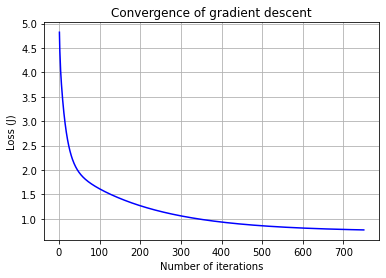

In [8]:
plt.plot(range(1, ITERATIONS + 1),lossHistory, color='blue')
plt.rcParams["figure.figsize"] = (20,10)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

In [9]:
V = np.array([1, 2, 3]).reshape([3,1])
V = np.hstack((V, np.array([1, 0, 2]).reshape([3,1])))
V = np.hstack((V, np.array([1, 4, 1]).reshape([3,1])))
print("V = {0}".format(V))
V = np.hstack((np.ones((3, 1)), V))

V = [[1 1 1]
 [2 0 4]
 [3 2 1]]


In [10]:
H = V.dot(finalTheta)
print("H(V) = {0}".format(H.reshape([1,3])))

H(V) = [[3.14043654 0.13953574 0.02332835]]


In [11]:
print("h(X1,X2,X3) = {0:.3f} X1 + {1:.3f} X2 + {2:.3f} X3 + {3:.3f}".format(float(finalTheta[1]),float(finalTheta[2]),float(finalTheta[3]),float(finalTheta[0])))

h(X1,X2,X3) = -1.891 X1 + 0.665 X2 + -0.148 X3 + 4.515
